# RCRS

In [1]:
!git clone https://github.com/SiddhantAshtekar/Human_parsing_for_rcrs.git
%cd Human_parsing_for_rcrs

fatal: destination path 'Human_parsing_for_rcrs' already exists and is not an empty directory.
/content/Human_parsing_for_rcrs


In [2]:
!pip install ninja

In [3]:
import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys

from predict_pose import generate_pose_keypoints

In [4]:
'''
gdown.download('https://drive.google.com/uc?id=1PgBrd6FX_RPCuJlVNSm46LTu9emvOPZF', 'Data_preprocessing/data.zip', quiet=False)
%cd Data_preprocessing
!unzip data
%cd ..
'''

"\ngdown.download('https://drive.google.com/uc?id=1PgBrd6FX_RPCuJlVNSm46LTu9emvOPZF', 'Data_preprocessing/data.zip', quiet=False)\n%cd Data_preprocessing\n!unzip data\n%cd ..\n"

In [5]:
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

mkdir: cannot create directory ‘Data_preprocessing/test_color’: File exists
mkdir: cannot create directory ‘Data_preprocessing/test_colormask’: File exists
mkdir: cannot create directory ‘Data_preprocessing/test_edge’: File exists
mkdir: cannot create directory ‘Data_preprocessing/test_img’: File exists
mkdir: cannot create directory ‘Data_preprocessing/test_label’: File exists
mkdir: cannot create directory ‘Data_preprocessing/test_mask’: File exists
mkdir: cannot create directory ‘Data_preprocessing/test_pose’: File exists
mkdir: cannot create directory ‘inputs’: File exists
mkdir: cannot create directory ‘inputs/img’: File exists
mkdir: cannot create directory ‘inputs/cloth’: File exists


In [6]:
%cd pose
!gdown --id 1OSZhNdFAUOUFuZTnZxyYjtLmhTLK2uOs
%cd ..

/content/Human_parsing_for_rcrs/pose
Downloading...
From: https://drive.google.com/uc?id=1OSZhNdFAUOUFuZTnZxyYjtLmhTLK2uOs
To: /content/Human_parsing_for_rcrs/pose/pose_iter_440000.caffemodel
100% 209M/209M [00:01<00:00, 172MB/s]
/content/Human_parsing_for_rcrs


In [7]:
!git clone https://github.com/SiddhantAshtekar/self_human_parsing.git
!git clone https://github.com/SiddhantAshtekar/u2net.git

fatal: destination path 'self_human_parsing' already exists and is not an empty directory.
fatal: destination path 'u2net' already exists and is not an empty directory.


In [8]:
#for segmentation mask generation
gdown.download('https://drive.google.com/uc?id=1WVDAVUtK0y0cHaBB-mi4IQq-3VhMiuFn', 'lip_final.pth', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1WVDAVUtK0y0cHaBB-mi4IQq-3VhMiuFn
To: /content/Human_parsing_for_rcrs/lip_final.pth
100%|██████████| 267M/267M [00:01<00:00, 214MB/s]


'lip_final.pth'

In [9]:
%cd u2net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1K3TBq8ftHT99B-DvP9p0N3t0-_5PUnrR -O saved_models/u2netp/u2netp.pth
!gdown --id 1U7SbCBKfk4Qb0p6WMCZ6s9jNPEpDC_vT -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..

/content/Human_parsing_for_rcrs/u2net
mkdir: cannot create directory ‘saved_models’: File exists
mkdir: cannot create directory ‘saved_models/u2net’: File exists
mkdir: cannot create directory ‘saved_models/u2netp’: File exists
Downloading...
From: https://drive.google.com/uc?id=1K3TBq8ftHT99B-DvP9p0N3t0-_5PUnrR
To: /content/Human_parsing_for_rcrs/u2net/saved_models/u2netp/u2netp.pth
100% 4.68M/4.68M [00:00<00:00, 74.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1U7SbCBKfk4Qb0p6WMCZ6s9jNPEpDC_vT
To: /content/Human_parsing_for_rcrs/u2net/saved_models/u2net/u2net.pth
100% 176M/176M [00:01<00:00, 113MB/s] 
...load U2NEP---4.7 MB
/content/Human_parsing_for_rcrs


In [10]:
!mkdir checkpoints
gdown.download('https://drive.google.com/uc?id=1X_Y6UY4bZTsw1T5o-zNZFd6UUMvCwhQM',output='checkpoints/RCRS_checkpoints.zip', quiet=False)
%cd checkpoints
!unzip RCRS_checkpoints
%cd ..

mkdir: cannot create directory ‘checkpoints’: File exists


Downloading...
From: https://drive.google.com/uc?id=1X_Y6UY4bZTsw1T5o-zNZFd6UUMvCwhQM
To: /content/Human_parsing_for_rcrs/checkpoints/RCRS_checkpoints.zip
100%|██████████| 524M/524M [00:02<00:00, 208MB/s]


/content/Human_parsing_for_rcrs/checkpoints
Archive:  RCRS_checkpoints.zip
replace label2city/latest_net_G.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
/content/Human_parsing_for_rcrs


### Please upload your cloth image below

In [11]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/Human_parsing_for_rcrs/inputs/cloth


Saving 001109_1.jpg to 001109_1.jpg
/content/Human_parsing_for_rcrs/inputs
/content/Human_parsing_for_rcrs


### Please upload your person image below

In [12]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/Human_parsing_for_rcrs/inputs/img


Saving 000258_0.jpg to 000258_0.jpg
/content/Human_parsing_for_rcrs/inputs
/content/Human_parsing_for_rcrs


In [13]:
sorted(os.listdir('inputs/cloth'))

['001109_1.jpg']

In [14]:
cloth_name = '000001_1.png'
cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[0])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

Generating mask for: 000001_1.png
Saving output at Data_preprocessing/test_edge/000001_1.png


In [15]:
sorted(os.listdir('inputs/img'))

['000258_0.jpg']

In [16]:
import time

start_time = time.time()
img_name = '000001_0.png'
img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[0])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))

!python3 self_human_parsing/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time))

Resized image in 0.014671087265014648s
100% 1/1 [00:00<00:00,  3.18it/s]
Parsing generated in 6.88634467124939s
File saved at Data_preprocessing/test_pose/000001_0_keypoints.json
Pose map generated in 6.21584939956665s


In [17]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_0.png 000001_1.png')

In [18]:
!python test.py

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/tes

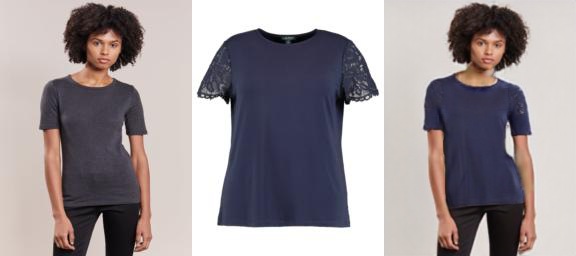

In [19]:
output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_0.png')),
                np.array(Image.open('Data_preprocessing/test_color/000001_1.png')),
                np.array(Image.open('results/test/try-on/000001_0.png'))], axis=1)
image_grid = Image.fromarray(output_grid)
image_grid

### Check results in 'results' folder!

**Deleting all images**

In [20]:
!rm -rf Data_preprocessing/test_color/*
!rm -rf Data_preprocessing/test_colormask/*
!rm -rf Data_preprocessing/test_edge/*
!rm -rf Data_preprocessing/test_img/*
!rm -rf Data_preprocessing/test_label/*
!rm -rf Data_preprocessing/test_mask/*
!rm -rf Data_preprocessing/test_pose/*
!rm -rf inputs/cloth/*
!rm -rf inputs/img/*

In [21]:
!rm -rf results/*

In [22]:
%cd /content/

/content
